# A Sentiment Analysis of MLB Performance
### ADS-509 Final Project Team 11

In [1]:
#Install reqired libraries
!pip install beautifulsoup4 requests

In [2]:
#Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

The first step in our effort is to scrape blog post text from the mlbtraderumors.com website.  This posts include text, dates posted, and the authors name.  We will scrape this information and store it in a file that we can use to start our text analysis.

In [3]:
# URL of the website to scrape
url = "https://www.mlbtraderumors.com/washington-nationals?show=all"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all the news article elements
articles = soup.find_all("article")

# Create a file to save the scraped data
file_path = "C:/Users/earne/OneDrive - University of San Diego/MSADS/ADS-509/Project/data/mlbtraderumors_washington_nationals_articles1.txt"

with open(file_path, "w", encoding="utf-8") as file:
    # Iterate over the articles and extract the text
    for article in articles:
        # Extract the article title
        title = soup.find("h2").text.strip()

        #Extract the article author
        author = soup.find("span", class_="entry-author").text.strip()

        #Extract the article date
        date = soup.find("time", class_= 'entry-time').text.strip()
        
        # Extract the article content
        content = soup.find("div", class_="entry-content").text.strip()
        
        # Write the title and content to the file
        file.write("Title: " + title + "\n")
        file.write("Author: " + author + "\n")
        file.write("Date: " + date + "\n")
        file.write("Content: " + content + "\n")
        file.write("---\n")

print("Data saved to", file_path)

Data saved to C:/Users/earne/OneDrive - University of San Diego/MSADS/ADS-509/Project/data/mlbtraderumors_washington_nationals_articles1.txt


Here, I inspected each part of the above to figure try and figure out why it scrapes the headlines, but only copies the author and date for the first article.

In [19]:
title_list = []

for article in articles:
        # Extract the article title
        title = article.find("h2").text.strip()

        title_list.append(title)

print(title_list[0:10])


['Nationals Claim Joe La Sorsa', 'Nationals Outright Andres Machado', 'Tigers, Nationals Relievers Drawing Trade Interest', 'Nationals To Designate Erasmo Ramirez For Assignment', 'Nationals’ Victor Arano To Undergo Shoulder Surgery', 'Nationals Designate Andres Machado For Assignment', 'Best Deadline Rental Returns In Recent History: Honorable Mentions', 'Stephen Strasburg Shut Down From All Physical Activity', 'Nine Veterans With Upcoming Minor League Opt-Out Opportunities', 'Quick Hits: Stroman, Maeda, Orioles, Barreto']


In [17]:
author_list = []

for article in articles:
        # Extract the article title
        author = soup.article.find("span", class_="entry-author").text.strip()

        author_list.append(author)

print(author_list[0:10])

['Steve Adams', 'Steve Adams', 'Steve Adams', 'Steve Adams', 'Steve Adams', 'Steve Adams', 'Steve Adams', 'Steve Adams', 'Steve Adams', 'Steve Adams']


In [18]:
date_list = []

for article in articles:
        # Extract the article date
        date = soup.find("time", class_= 'entry-time').text.strip()

        date_list.append(date)

print(date_list[0:10])

['June 8, 2023', 'June 8, 2023', 'June 8, 2023', 'June 8, 2023', 'June 8, 2023', 'June 8, 2023', 'June 8, 2023', 'June 8, 2023', 'June 8, 2023', 'June 8, 2023']


Import data on the washington nationals from baseball-reference.com

https://www.baseball-reference.com/teams/WSN/attend.shtml

In [7]:
path = "C:/Users/earne/OneDrive - University of San Diego/MSADS/ADS-509/Project/data/"

nats_df = pd.DataFrame(pd.read_csv(path + 'nats_statistics.csv'))
nats_df.head()

,Year,Tm,W,L,Finish,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
0,2023,Washington Nationals,25,35,5,690991.0,21593.0,12th of 15,"$98,376,067",96,94,Nationals Park
1,2022,Washington Nationals,55,107,5,2026401.0,25017.0,11th of 15,"$125,051,666",96,94,Nationals Park
2,2021,Washington Nationals,65,97,5,1465543.0,18093.0,12th of 15,"$172,370,147",96,95,Nationals Park
3,2020,Washington Nationals,26,34,5,NaN,NaN,15th of 15,"$172,237,283",99,99,Nationals Park
4,2019,Washington Nationals,93,69,2,2259781.0,27899.0,11th of 15,"$203,016,595",102,102,Nationals Park


In [8]:
nats_df= nats_df[nats_df['Year'] > 2004]
nats_df

,Year,Tm,W,L,Finish,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
0,2023,Washington Nationals,25,35,5,690991.0,21593.0,12th of 15,"$98,376,067",96,94,Nationals Park
1,2022,Washington Nationals,55,107,5,2026401.0,25017.0,11th of 15,"$125,051,666",96,94,Nationals Park
2,2021,Washington Nationals,65,97,5,1465543.0,18093.0,12th of 15,"$172,370,147",96,95,Nationals Park
3,2020,Washington Nationals,26,34,5,NaN,NaN,15th of 15,"$172,237,283",99,99,Nationals Park
4,2019,Washington Nationals,93,69,2,2259781.0,27899.0,11th of 15,"$203,016,595",102,102,Nationals Park
5,2018,Washington Nationals,82,80,2,2529604.0,31230.0,8th of 15,"$188,886,699",105,106,Nationals Park
6,2017,Washington Nationals,97,65,1,2524980.0,31173.0,7th of 15,"$175,587,301",103,104,Nationals Park
7,2016,Washington Nationals,95,67,1,2481938.0,30641.0,7th of 15,"$152,967,400",102,103,Nationals Park
8,2015,Washington Nationals,83,79,2,2619843.0,32344.0,5th of 15,"$176,496,372",101,102,Nationals Park
9,2014,Washington Nationals,96,66,1,2579389.0,31844.0,7th of 15,"$137,235,080",102,104,Nationals Park


In [9]:
#remove the dollar sign from Est. Payroll column
nats_df['Est. Payroll'] = nats_df['Est. Payroll'].replace({'\$':''}, regex = True)
nats_df['Est. Payroll'] = nats_df['Est. Payroll'].replace({'\,':''}, regex = True)
nats_df.head()

,Year,Tm,W,L,Finish,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
0,2023,Washington Nationals,25,35,5,690991.0,21593.0,12th of 15,98376067,96,94,Nationals Park
1,2022,Washington Nationals,55,107,5,2026401.0,25017.0,11th of 15,125051666,96,94,Nationals Park
2,2021,Washington Nationals,65,97,5,1465543.0,18093.0,12th of 15,172370147,96,95,Nationals Park
3,2020,Washington Nationals,26,34,5,NaN,NaN,15th of 15,172237283,99,99,Nationals Park
4,2019,Washington Nationals,93,69,2,2259781.0,27899.0,11th of 15,203016595,102,102,Nationals Park


In [10]:
nats_df['Est. Payroll'] = nats_df['Est. Payroll'].astype(float)
nats_df.dtypes

Year              int64
Tm               object
W                 int64
L                 int64
Finish            int64
Attendance      float64
Attend/G        float64
Rank             object
Est. Payroll    float64
PPF               int64
BPF               int64
Stadium          object
dtype: object

In [11]:
nats_df.describe()

,Year,W,L,Finish,Attendance,Attend/G,Est. Payroll,PPF,BPF
count,19.000000,19.000000,19.000000,19.000000,1.800000e+01,18.000000,1.900000e+01,19.000000,19.000000
mean,2014.000000,73.315789,77.842105,3.368421,2.163151e+06,27467.833333,1.163850e+08,99.526316,99.263158
std,5.627314,21.587169,20.331320,1.738790,5.082355e+05,4567.136563,5.466072e+07,2.988281,3.983886
min,2005.000000,25.000000,34.000000,1.000000,6.909910e+05,18093.000000,3.694750e+07,95.000000,94.000000
25%,2009.500000,62.000000,66.500000,2.000000,1.941312e+06,24062.500000,6.604250e+07,96.000000,95.000000
50%,2014.000000,80.000000,80.000000,4.000000,2.290090e+06,28452.000000,1.124932e+08,100.000000,99.000000
75%,2018.500000,89.500000,92.000000,5.000000,2.528448e+06,31215.750000,1.723037e+08,101.500000,102.500000
max,2023.000000,98.000000,107.000000,5.000000,2.731993e+06,33728.000000,2.030166e+08,105.000000,106.000000


Text(0.5, 1.0, 'Attendance of Washington Nationals over the years')

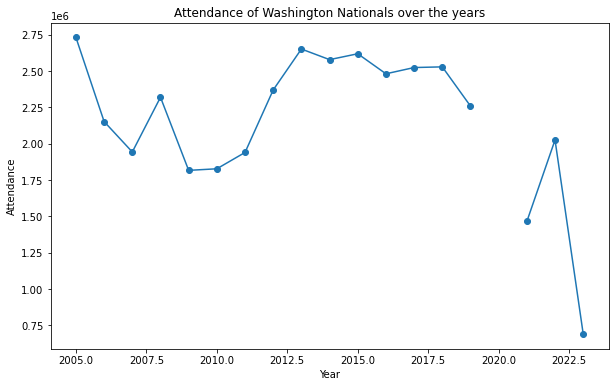

In [12]:
#plot data
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Attendance over the years
plt.plot(nats_df['Year'], nats_df['Attendance'], marker='o')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.title('Attendance of Washington Nationals over the years')

Text(0.5, 1.0, 'Wins of Washington Nationals over the years')

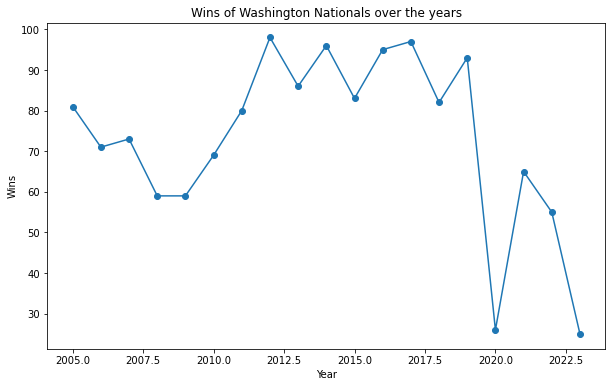

In [13]:
# Plotting Wins over the years
plt.figure(figsize=(10, 6))
plt.plot(nats_df['Year'], nats_df['W'], marker='o')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.title('Wins of Washington Nationals over the years')

Text(0.5, 1.0, 'Payroll of Washington Nationals over the years')

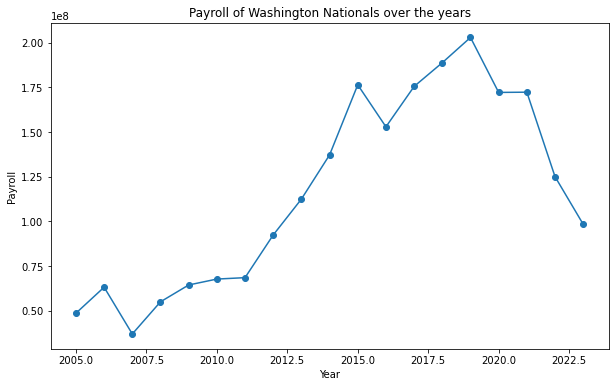

In [14]:
# Plotting Payroll over the years
plt.figure(figsize=(10, 6))
plt.plot(nats_df['Year'], nats_df['Est. Payroll'], marker='o')
plt.xlabel('Year')
plt.ylabel('Payroll')
plt.title('Payroll of Washington Nationals over the years')

                  Year         W         L    Finish  Attendance  Attend/G  \
Year          1.000000 -0.284460 -0.436536 -0.147622   -0.345756 -0.200831   
W            -0.284460  1.000000  0.173915 -0.793633    0.813503  0.659039   
L            -0.436536  0.173915  1.000000  0.317609    0.116156 -0.261597   
Finish       -0.147622 -0.793633  0.317609  1.000000   -0.583251 -0.631068   
Attendance   -0.345756  0.813503  0.116156 -0.583251    1.000000  0.886255   
Attend/G     -0.200831  0.659039 -0.261597 -0.631068    0.886255  1.000000   
Est. Payroll  0.772917  0.173634 -0.371859 -0.491810    0.208637  0.232524   
PPF           0.148668  0.520898 -0.175952 -0.734371    0.508102  0.504582   
BPF           0.153642  0.605563 -0.255982 -0.832812    0.595520  0.600780   

              Est. Payroll       PPF       BPF  
Year              0.772917  0.148668  0.153642  
W                 0.173634  0.520898  0.605563  
L                -0.371859 -0.175952 -0.255982  
Finish           -0.491

Text(0.5, 1.0, 'Correlation Matrix')

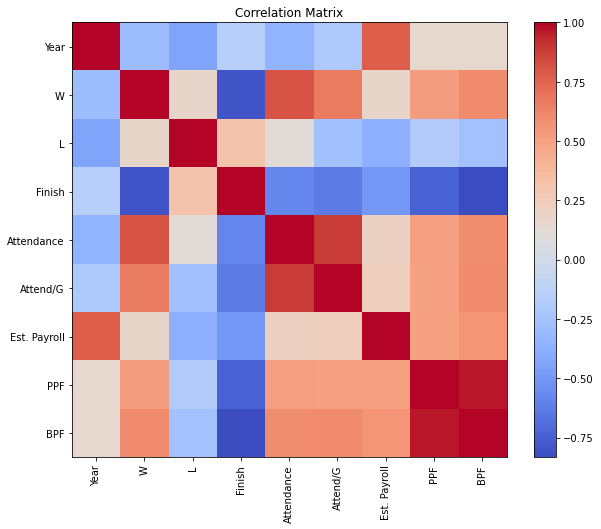

In [15]:
# Correlation matrix
correlation = nats_df.corr()
print(correlation)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Correlation Matrix')